In [1]:
import pandas as pd
import numpy as np

In [2]:
names=['restaurant', 'address', 'latitude', 'longitude', 'status', 'tables', 'booth', 'ppp']
df = pd.read_excel('MoHi_Manhattanville Restaurant Statuses.xlsx', names=names)
df.head(20)

,restaurant,address,latitude,longitude,status,tables,booth,ppp
0,Zannys,"975 Columbus Ave, New York, NY 10025",40.800308,-73.961675,Closed,NaN,NaN,NaN
1,Roasted Masala,"914 Columbus Ave, New York, NY 10025",40.798561,-73.963770,Closed,NaN,NaN,NaN
2,Elsa,"903 Columbus Ave, New York, NY 10025",40.798014,-73.963528,Closed,NaN,NaN,NaN
3,Uncle Luoyang,"928 Amsterdam Ave, New York, NY 10025",40.800230,-73.966261,Closed,NaN,NaN,NaN
4,The Ellington,"936 Amsterdam Ave, New York, NY 10025",40.800658,-73.965842,Closed,NaN,NaN,"$150k-$350k, 18 jobs retained"
5,La Toulousianne,"942 Amsterdam Ave, New York, NY 10025",40.800876,-73.965678,Closed,NaN,NaN,NaN
6,Hamilton,"998 Amsterdam Ave, New York, NY 10025",40.802773,-73.964390,Closed,NaN,NaN,NaN
7,Flat Top,"1241 Amsterdam Ave, New York, NY 10027",40.810047,-73.958478,Closed,NaN,NaN,NaN
8,Floridita,"2276 12th Ave, New York, NY 10027",40.817998,-73.960982,Closed,NaN,NaN,NaN
9,Cascabel Taqueria,"2799 Broadway, New York, NY 10025",40.802973,-73.967900,Closed,NaN,NaN,"$150-350k, 0 jobs retained"


In [3]:
# replace N/A's in tables to 0 since theyre closed
df['tables'] = df['tables'].fillna('0')
df['tables'] = df['tables'].replace('[^0-9.]+', '0', regex=True)

In [4]:
# assumes all blank ppp are under 150k, and 0 jobs
df['ppp'].fillna('$0-$150k, 0 jobs created', inplace=True)
df[['loan', 'jobs']] = df['ppp'].str.split(',', expand=True)

# make all format the same
conv = {
    '$0-$150k': '$0-$150k',
    '$150k-$350k': '$150k-$350k',
    '$150-350k': '$150k-$350k',
    '$350-500k': '$350k-$500k',
    '$350k-500k': '$350k-$500k',
    '$500k-$1 million': '$500k-$1mm'
}
df['loan'] = df['loan'].apply(lambda x: conv[x])

# scrape number from jobs
df['jobs'] = df['jobs'].str.findall('[0-9]+').str[-1]

In [5]:
# convert columns to right datatype
df['jobs'] = df['jobs'].astype(int)
df['tables'] = df['tables'].astype(int)

In [6]:
df['booth'] = np.where(df['booth'].isnull(), 0, 1)

In [7]:
def clean_status(x):
    if x == 'Closed' or x == 'Outdoor' or x == 'Takeout':
        return x
    
    if x == 'New/Outdoor':
        return 'Outdoor'
    elif x == 'Rooftop':
        return 'Outdoor'
    else:
        return 'Closed'
df['status'] = df['status'].apply(clean_status)

In [8]:
df.to_csv('MoHi_cleaned.csv', index=False)

In [9]:
df1 = pd.read_excel('MoHi_Manhattanville Restaurant Statuses.xlsx', sheet_name='Sheet2', names=['ppp'])
df1 = df1[:-1] # dont read last row
df1[df1['ppp'] == '$91,400, 11 jobs retained'] = '$91400, 11 jobs retained'


df1[['loan', 'jobs']] = df1['ppp'].str.split(',', expand=True)


# scrape number from jobs
df1['jobs'] = df1['jobs'].str.findall('[0-9]+').str[-1]

# replace loan amount with 0-150k to keep the format the same
df1['loan'] = '$0-$150k'

In [10]:
df2 = df[df['loan'] != '$0-$150k'][['ppp', 'loan', 'jobs']]
final= pd.concat([df1, df2], axis=0).reset_index(drop=True)
final.head()

,ppp,loan,jobs
0,"$136835, 0 jobs retained",$0-$150k,0
1,"$134200, 15 jobs retained",$0-$150k,15
2,"$131800, 10 jobs retained",$0-$150k,10
3,"$121270, 27 jobs retained",$0-$150k,27
4,"$113500, 19 jobs retained",$0-$150k,19


In [11]:
final.to_csv('loan_jobs.csv', index=False)

## Plotting

In [92]:
df.head()

,restaurant,address,latitude,longitude,status,tables,booth,ppp,loan,jobs
0,Zannys,"975 Columbus Ave, New York, NY 10025",40.800308,-73.961675,Closed,0,0,"$0-$150k, 0 jobs created",$0-$150k,0
1,Roasted Masala,"914 Columbus Ave, New York, NY 10025",40.798561,-73.963770,Closed,0,0,"$0-$150k, 0 jobs created",$0-$150k,0
2,Elsa,"903 Columbus Ave, New York, NY 10025",40.798014,-73.963528,Closed,0,0,"$0-$150k, 0 jobs created",$0-$150k,0
3,Uncle Luoyang,"928 Amsterdam Ave, New York, NY 10025",40.800230,-73.966261,Closed,0,0,"$0-$150k, 0 jobs created",$0-$150k,0
4,The Ellington,"936 Amsterdam Ave, New York, NY 10025",40.800658,-73.965842,Closed,0,0,"$150k-$350k, 18 jobs retained",$150k-$350k,18


In [100]:
data = df['status']
bins = np.arange(3)-0.5
hist, edges = np.histogram(data, bins=bins)

y = np.arange(1,hist.max()+1)
x = np.arange(12)
X,Y = np.meshgrid(x,y)

plt.scatter(X,Y, c=Y<=hist, cmap="Greys")

plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

<AxesSubplot:>

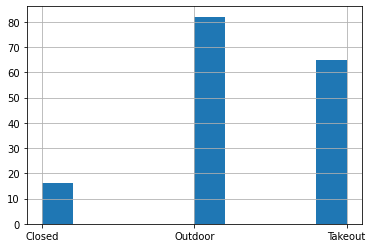

In [99]:
df['status'].hist()